In [1]:
import warnings
warnings.filterwarnings('ignore')

import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim

from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import numpy as np

import torchvision.datasets as datasets 
import torchvision.transforms as transforms
import time

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

Using cuda device


# MNIST HAND WRITTEN NUMBER

Define various neural network structures with tanh, sigmoid, linear, relu, define number of neurons in each layer and forward the input data to one-hot-coding for numbers 0-9. **You are NOT expected to use Convolution Layers!** <br>
*Hint: Input files are 28x28 images.*
<br>
*Hint: Use .view method in the forward function to make a column vector from 28x28 image*


In this assignment, you are expected to train your own Neural Network model. You are free to refer to resources online and bogaziciai github repository while constructing your neural network.  

In [3]:
## Normalization and create a tensor for a training/test set 

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])


mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

### Step 1

Defining the structure of the neural network.

In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.linear1 = nn.Linear(28*28, 256)
        self.linear2 = nn.Linear(256, 64)
        self.linear3 = nn.Linear(64, 10)

    def forward(self, img): #convert + flatten
        # view() reshapes the tensor without copying memory, similar to numpy's reshape().
        out = img.view(img.size(0), -1)
        
        # forward propagation
        out = self.linear1(out)
        out = F.relu(out)
        out = self.linear2(out)
        out = F.relu(out)
        out = self.linear3(out)
        out = F.relu(out)
        return out

### Step 2

Deciding on the optimizer, number of batches, loss function and the number of epochs

In [5]:
model = Net().to(device)

loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.9)
batch_size = 50
epochs = 10

train_loader = torch.utils.data.DataLoader(mnist_trainset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_testset, batch_size=batch_size, shuffle=True)

### Step 3
Start the training.

In [6]:
for epoch in range(epochs):
    ### YOUR CODE
    running_loss = 0.0
    for i, data in(enumerate(train_loader)):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        output = model(inputs.view(-1, 28*28))
        l = loss(output, labels)
        l.backward()
        optimizer.step()
        
        running_loss += l.item()
        if i % 1000 == 999:    # print every 100 mini-batches
            print('[%d, %5d] loss: %.5f' %
            (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0
    print(f"epoch {epoch} done")
            
print('Finished Training')

[1,  1000] loss: 6.00721
epoch 0 done
[2,  1000] loss: 1.70529
epoch 1 done
[3,  1000] loss: 1.20369
epoch 2 done
[4,  1000] loss: 0.93418
epoch 3 done
[5,  1000] loss: 0.78972
epoch 4 done
[6,  1000] loss: 0.67052
epoch 5 done
[7,  1000] loss: 0.54482
epoch 6 done
[8,  1000] loss: 0.49093
epoch 7 done
[9,  1000] loss: 0.42796
epoch 8 done
[10,  1000] loss: 0.37160
epoch 9 done
Finished Training


### Step 4
Test your model's accuracy

In [7]:
correct =0
total=0


with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        output = model(inputs.to(device).view(-1, 784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == labels[idx]:
                correct +=1
            total +=1
print(f'accuracy: {round(correct/total, 3)}')

accuracy: 0.977


### Step 5

Get some training or test data samples to visualize the predictions.

Batch_Size=  50
True Label = 8 
True Label = 4 
True Label = 1 
True Label = 4 
True Label = 3 
True Label = 5 
True Label = 9 
True Label = 3 
True Label = 5 
True Label = 1 


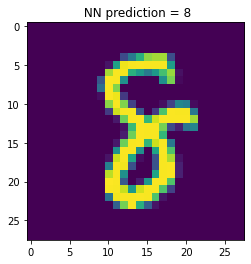

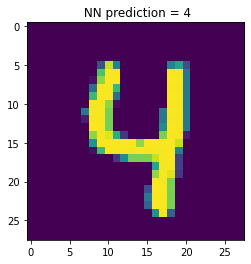

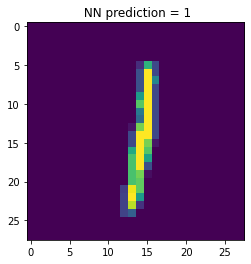

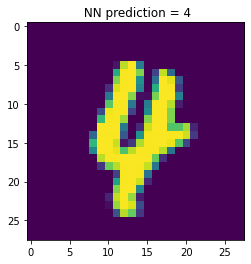

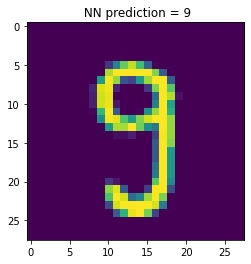

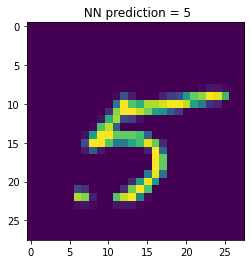

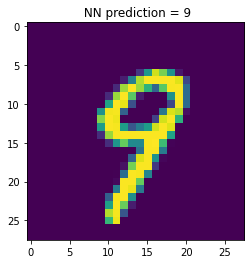

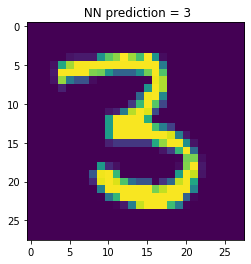

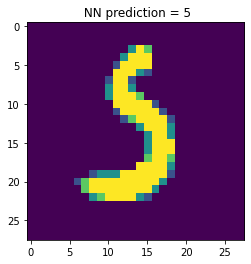

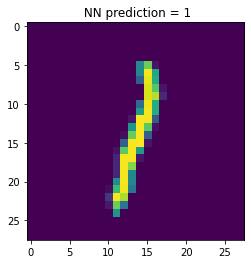

In [14]:
def TakesamplesfromNthBatch(loader,N,model):
    
    inputsout=[]
    labelsout=[]
    
    for i,data in enumerate(train_loader):
        inputs, labels = data
        inputsout=inputs.squeeze().numpy()
        labelsout=labels.numpy()    
           
        if i==N:
            prediction = model(inputs.to(device).view(-1, 784))
            predictionout = np.argmax(prediction.detach().cpu().numpy(),axis=1) 
            break

    return inputsout, labelsout, predictionout

trial_input,trial_labels,trial_prediction = TakesamplesfromNthBatch(train_loader,1,model)
print('Batch_Size= ', batch_size)

numberIntheBatch=0
Nofexamples=10
for i in range(Nofexamples):    
    
    plt.figure()
    imgplot = plt.imshow(trial_input[numberIntheBatch])
    plt.title(' NN prediction = %i'  %trial_prediction[numberIntheBatch])
    print('True Label = %i ' %trial_labels[numberIntheBatch])
    numberIntheBatch=numberIntheBatch+1